# Machine Learning Project on Logistic Regression Classification 
## by Vinay Kumar Ranganath Babu

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the data using Pandas library
admissions = pd.read_csv("admissions.csv")
admissions.shape

(644, 3)

In [24]:
admissions.head(10)

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894
5,0,3.599108,442.763567
6,0,3.238972,667.472189
7,0,3.420177,561.713905
8,0,3.562482,590.340371
9,0,3.910495,463.470183


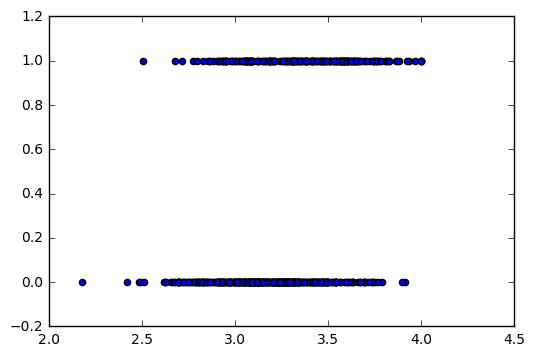

In [3]:
# Plot the scatter plot to have a better idea on the data
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

# Logit Function

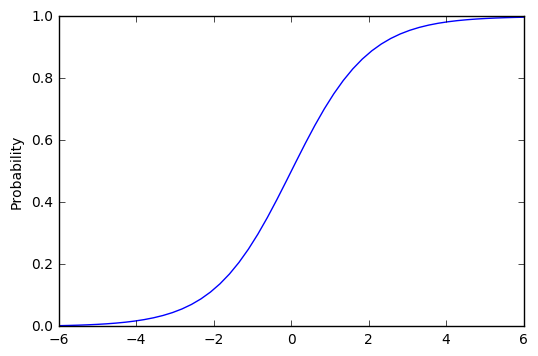

In [26]:
# Logit Function
def logit(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logit function.
y = logit(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

# Training A Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Plotting Probabilities

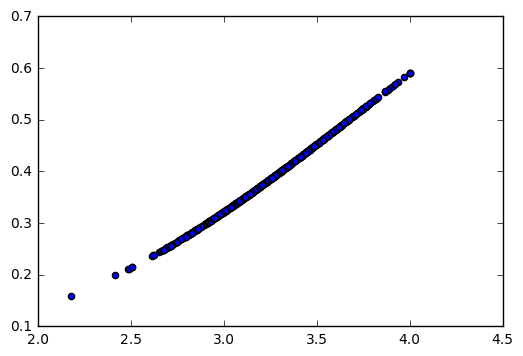

In [28]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions['gpa'],pred_probs[:,1])

# Predict Labels

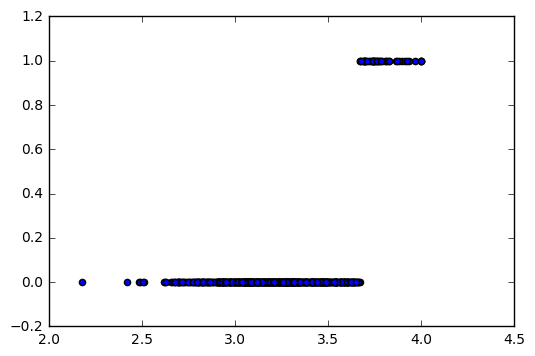

In [29]:
fitted_labels = logistic_model.predict(admissions[["gpa"]])
plt.scatter(admissions["gpa"], fitted_labels)

In [30]:
admissions['predicted_label'] = fitted_labels
print(admissions["predicted_label"].value_counts())
admissions.head()

0    598
1     46
Name: predicted_label, dtype: int64


,admit,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


# Accuracy

In [44]:
admissions['actual_label'] = admissions['admit']
matches = (admissions['actual_label'] == admissions['predicted_label'])
correct_predictions = admissions[matches]
accuracy = correct_predictions.shape[0] / admissions.shape[0]
print(accuracy)

correct_predictions.head()

0.6459627329192547


,admit,gpa,gre,predicted_label,actual_label
0,0,3.177277,594.102992,0,0
1,0,3.412655,631.528607,0,0
2,0,2.728097,553.714399,0,0
3,0,3.093559,551.089985,0,0
4,0,3.141923,537.184894,0,0


The raw accuracy is around 64.6% which is better than randomly guessing the label (which would result in around a 50% accuracy). 

# Binary Classification Outcomes

In [36]:
true_positives = len(admissions[(admissions['predicted_label'] == 1) & (admissions['actual_label'] == 1)])
true_negatives = len(admissions[(admissions['predicted_label'] == 0) & (admissions['actual_label'] == 0)])

print(true_positives)
print(true_negatives)

31
385


# Sensitivity

In [37]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])

sensitivity = true_positives / (true_positives + false_negatives)

sensitivity

0.12704918032786885

The sensitivity of the model is around 12.7% and only about 1 in 8 students that should have been admitted were actually admitted

# Specificity

In [19]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])
false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])
specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)

0.9625


The specificity of the model is 96.25%. This means that the model is really good at knowing which applicants to reject. Since around only 7% of applicants were accepted that applied, it's important that the model reject people correctly who wouldn't have otherwise been accepted